In [1]:
from cnn_globals import *

from cnn_data import cnn_data, cnn_data_split

%matplotlib inline

[INFO    ] Using cmssw CMSSW_10_1_7
[INFO    ] Using numpy 1.15.1
[INFO    ] Using tensorflow 1.10.0
[INFO    ] Using keras 2.1.6-tf
[INFO    ] .. list devices: [_DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 268435456)]
[INFO    ] Using scipy 1.1.0
[INFO    ] Using sklearn 0.19.2


In [2]:
# Import images and labels
#data = cnn_data_split(infile_images, test_size=0.4, shuffle=False, nentries=80000)
data = cnn_data_split(infile_images, test_size=0.3, shuffle=False, nentries=3535500)

(images_px_train, images_px_test, images_ch_train, images_ch_test, labels_train, labels_test, parameters_train, parameters_test) = data

[INFO    ] Loading cnn data from ../test7/histos_tbe.17.npz ...
[INFO    ] Loaded the images with shape (3535956, 50, 2),(3535956, 50, 3)
[INFO    ] Loaded the labels with shape (3535956, 3)
[INFO    ] Loaded the parameters with shape (3535956, 4)
[INFO    ] Loaded # of training and testing events: (48000, 32000)


In [3]:
use_jupyter = True

use_cnn_keras = False

if use_cnn_keras:
  from cnn_keras import define_reiam_flags, run_reiam
else:
  from cnn_estimator import define_reiam_flags, run_reiam

In [4]:
#from absl import app
#from absl import flags
flags = tf.flags
app = tf.app

estimators = {}  # keep alive

def main(_):
  data = (images_px_train, images_px_test, images_ch_train, images_ch_test, labels_train, labels_test, parameters_train, parameters_test)
  reiam_classifier = run_reiam(flags.FLAGS, data)
  estimators['reiam_classifier'] = reiam_classifier

def run(main, argv=['lol']):
  if use_jupyter:
    argv = flags.FLAGS(argv)
    main(argv)
  else:
    app.run(main=main, argv=argv)

#tf.logging.set_verbosity(tf.logging.INFO)
define_reiam_flags()
run(main)

INFO:tensorflow:Using config: {'_save_checkpoints_secs': 1200, '_global_id_in_cluster': 0, '_session_config': intra_op_parallelism_threads: 4
allow_soft_placement: true
, '_keep_checkpoint_max': 5, '_tf_random_seed': 2023, '_task_type': 'worker', '_train_distribute': None, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f14a4b1cf50>, '_model_dir': './reiam_model', '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_master': '', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_evaluation_master': '', '_service': None, '_device_fn': None, '_save_summary_steps': 100, '_num_ps_replicas': 0}
Instructions for updating:
`normal` is a deprecated alias for `truncated_normal`


Using TensorFlow backend.
[INFO    ] Begin training ...


INFO:tensorflow:Running training and evaluation locally (non-distributed).
INFO:tensorflow:Start train and evaluate loop. The evaluate will happen after every checkpoint. Checkpoint frequency is determined based on RunConfig arguments: save_checkpoints_steps None or save_checkpoints_secs 1200.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into ./reiam_model/model.ckpt.
INFO:tensorflow:cross_entropy = 3.0457294, learning_rate = 0.001, train_accuracy = 0.01, train_accuracy_at_k = 0.05
INFO:tensorflow:Saving timeline for 1 into './reiam_model/timeline-1.json'.
INFO:tensorflow:loss = 3.0457294, step = 1
INFO:tensorflow:global_step/sec: 4.33146
INFO:tensorflow:cross_entropy = 2.9850183, learning_rate = 0.001, train_accuracy = 0.05, train_accuracy_at_k = 0.075 (23

INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1440 into ./reiam_model/model.ckpt.
INFO:tensorflow:cross_entropy = 1.2271187, learning_rate = 0.001, train_accuracy = 0.43, train_accuracy_at_k = 0.8
INFO:tensorflow:Saving timeline for 1441 into './reiam_model/timeline-1441.json'.
INFO:tensorflow:loss = 1.2271187, step = 1441
INFO:tensorflow:global_step/sec: 4.27685
INFO:tensorflow:cross_entropy = 1.2212081, learning_rate = 0.001, train_accuracy = 0.44, train_accuracy_at_k = 0.79 (23.383 sec)
INFO:tensorflow:loss = 1.2212081, step = 1541 (23.141 sec)
INFO:tensorflow:global_step/sec: 4.37361
INFO:tensorflow:cross_entropy = 1.1572818, learning_rate = 0.001, train_accuracy = 0.45, train_accuracy_at_k = 0.8066667 (22.865 sec)
INFO:tensorflow:loss = 1.1572818, step = 1641 (22.865 sec)
INFO:tensorflow:global_step/sec: 4.42263
INFO:tensorflow:cross_entropy = 1.0775325, learning_rate = 0.001, train_accuracy = 0.46, train_accuracy_at_k = 0.82 (22.613 sec)
INFO:

[INFO    ] Done training. Time elapsed: 0:12:14.919635 sec


In [5]:
from cnn_keras import parse_image_fn, parse_label_fn
flags_obj = tf.flags.FLAGS

nentries_test = 32000

images_px_test = images_px_test[:nentries_test]
images_ch_test = images_ch_test[:nentries_test]
labels_test = labels_test[:nentries_test]

#images = map(lambda (px, ch): parse_image_fn(px, ch), zip(images_px_test, images_ch_test))
#labels = map(lambda lb: parse_label_fn(lb), labels_test)
#images = np.asarray(images)
#labels = np.asarray(labels)

images = np.array([parse_image_fn(px, ch) for (px, ch) in zip(images_px_test, images_ch_test)])
labels = np.array([parse_label_fn(lb) for lb in labels_test])

In [7]:
from cnn_models import load_my_model

from keras.utils.generic_utils import get_custom_objects
get_custom_objects().update({'rows_per_zone': rows_per_zone})

#tf.reset_default_graph()
loaded_model = load_my_model(name='model_cnn', weights_name='model_cnn_weights')

In [8]:
# Predict
labels_1 = np.argmax(labels,axis=1)
labels_pred_logits_1 = loaded_model.predict(images, batch_size=flags_obj.batch_size)
labels_pred_1 = np.argmax(labels_pred_logits_1, axis=1)

In [34]:
# Score
from sklearn.metrics import accuracy_score, r2_score
top_k_accuracy_score = lambda y_true, y_pred, k: tf.keras.metrics.top_k_categorical_accuracy(np.expand_dims(y_true, axis=-1), y_pred, k)
logger.info('accuracy_score: {0}'.format(accuracy_score(labels_1, labels_pred_1)))
logger.info('r2_score: {0}'.format(r2_score(labels_1, labels_pred_1)))
logger.info('accuracy_at_k(=2): {0}'.format(top_k_accuracy_score(labels_1, labels_pred_logits_1, k=2)))

[INFO    ] accuracy_score: 0.4555
[INFO    ] r2_score: 0.931956398381
[INFO    ] accuracy_at_k(=2): Tensor("Mean:0", shape=(), dtype=float32)


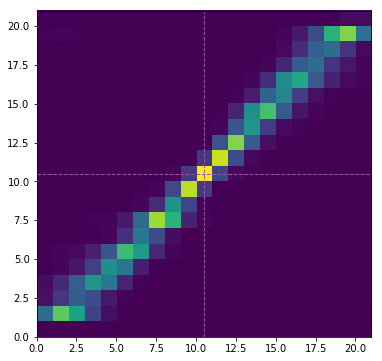

In [35]:
plt.figure(figsize=(6,6))
plt.axvline(x=10.5, linewidth=1, linestyle='--', color='#9954A8')
plt.axhline(y=10.5, linewidth=1, linestyle='--', color='#9954A8')
hist, xedges, yedges, _ = plt.hist2d(labels_1, labels_pred_1, bins=(21,21), range=((0,21),(0,21)), cmap=plt.cm.viridis)
plt.show()

In [36]:
reiam_classifier = estimators['reiam_classifier']

input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'image': images},
    y=None,
    batch_size=flags_obj.batch_size,
    num_epochs=1,
    shuffle=False)

In [42]:
# Predict
labels_2 = np.argmax(labels,axis=1)
predictions = reiam_classifier.predict(input_fn=input_fn)
labels_pred_logits_2 = np.array([prediction['logits'] for prediction in predictions])
labels_pred_2 = np.array([prediction['class_ids'] for prediction in predictions])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./reiam_model/model.ckpt-2400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [43]:
# Score
from sklearn.metrics import accuracy_score, r2_score
top_k_accuracy_score = lambda y_true, y_pred, k: tf.keras.metrics.top_k_categorical_accuracy(np.expand_dims(y_true, axis=-1), y_pred, k)
logger.info('accuracy_score: {0}'.format(accuracy_score(labels_2, labels_pred_2)))
logger.info('r2_score: {0}'.format(r2_score(labels_2, labels_pred_2)))
logger.info('accuracy_at_k(=2): {0}'.format(top_k_accuracy_score(labels_2, labels_pred_logits_2, k=2)))

ValueError: Found input variables with inconsistent numbers of samples: [32000, 0]

In [ ]:
plt.figure(figsize=(6,6))
plt.axvline(x=10.5, linewidth=1, linestyle='--', color='#9954A8')
plt.axhline(y=10.5, linewidth=1, linestyle='--', color='#9954A8')
hist, xedges, yedges, _ = plt.hist2d(labels_2, labels_pred_2, bins=(21,21), range=((0,21),(0,21)), cmap=plt.cm.viridis)
plt.show()